# Checkpoint 3



# Preprocessing part

In [115]:

import pandas as pd
df=pd.read_csv(r'C:\Users\SNB\Desktop\nouveau..csv', sep=';')
print(df.head())
print(df[['PassengerId','Survived']].head())
print(df.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None))

df.info()
print(df.isnull().sum())
df.isnull().sum().sum()
df.drop('Cabin',axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
print(df['Age'])
print(df['Age'].isnull().sum())

df.tail()
print(df['Embarked'].isnull().sum())
number_of_elements1 = len(df['Embarked'])
print('Number of elements Embarked :',number_of_elements1)
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S',inplace=True)
df.tail()
print(df['Embarked'].isnull().sum())
print(df.isnull().sum())
df.isnull().sum().sum()










   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
   PassengerId Survived
0          343       No
1           76       No
2          641       No
3        

0

# Visualization part

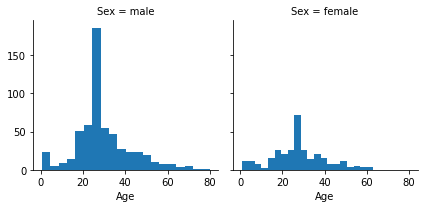

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Age',bins=20)

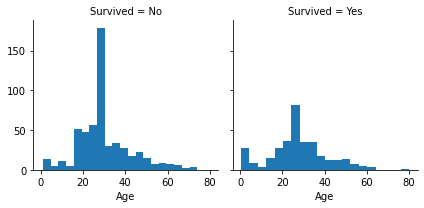

In [117]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=20)

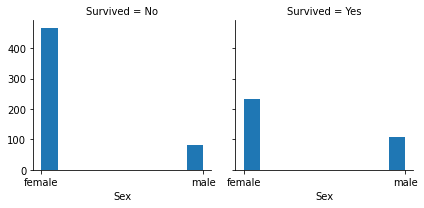

In [118]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Sex',bins=10)

C:\Users\SNB\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


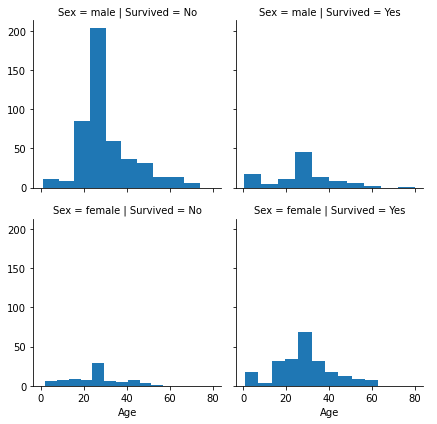

In [119]:
grid = sns.FacetGrid(df, row= 'Sex', col='Survived', size=3, aspect=1)
grid.map(plt.hist, 'Age', alpha=1)
grid.add_legend()

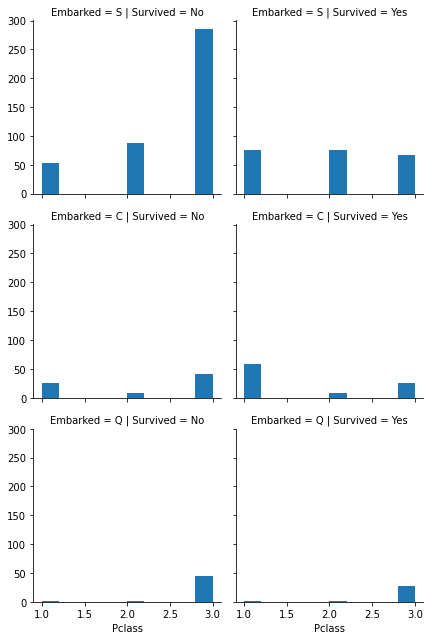

In [120]:
grid = sns.FacetGrid(df, row= 'Embarked', col='Survived', size=3, aspect=1)
grid.map(plt.hist, 'Pclass', alpha=1)
grid.add_legend()

In [121]:
clean_sex = {'Sex':{'male':0,'female':1}}
df.replace(clean_sex,inplace=True)
clean_embarked = {'Embarked':{'S':0,'C':1,'Q':2}}
df.replace(clean_embarked,inplace=True)
clean_survived = {'Survived':{'Yes':1,'No':0}}
df.replace(clean_survived,inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,0
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,0
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,1
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,0
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,0


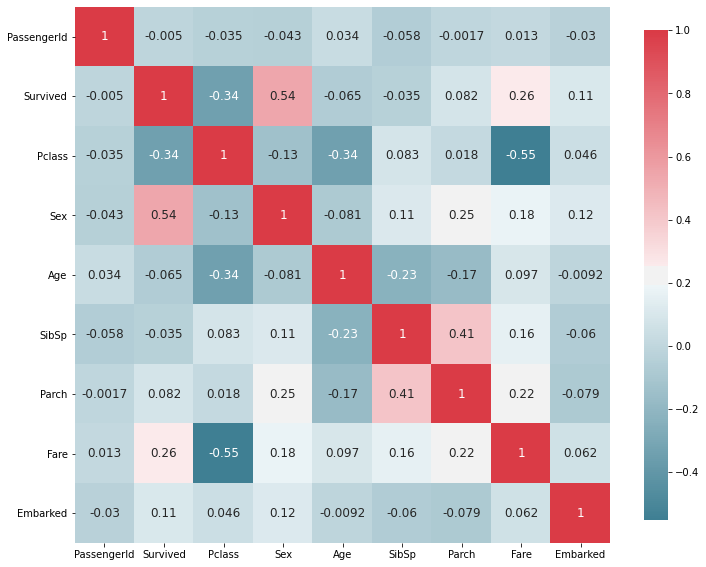

In [122]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = {'fontsize' : 12}

        )
plot_correlation_map( df )

In [123]:
# This function show us the correlations between all the columns,
#if the correlation is near to 1 so it means it's important
# and if it's near to 0 it means no correlations between them


In [124]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [125]:

df.drop('PassengerId',axis=1, inplace=True)
df.drop('Ticket',axis=1, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,0
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,0
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,0
4,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,0
...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,1
887,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,7.2292,1
888,0,3,"Cacic, Miss. Marija",1,30.0,0,0,8.6625,0
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,7.8958,0


In [126]:

Title=df.Name
print(Title)
d=len(Title)
for i in range(0,d):
 b=''
 x= Title[i].split(", ")
 y=x[1]
 z=y.split(". ")
 b=z[0]
 Title[i]=b
print(Title)
Title.head(50)
df['Title']=Title
df.head()



0                             Collander, Mr. Erik Gustaf
1                                Moen, Mr. Sigurd Hansen
2                                 Jensen, Mr. Hans Peder
3            Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                                 Davidson, Mr. Thornton
                             ...                        
886                  Nasser, Mrs. Nicholas (Adele Achem)
887                                Sirayanian, Mr. Orsen
888                                  Cacic, Miss. Marija
889                     Petroff, Mr. Pastcho ("Pentcho")
890    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
Name: Name, Length: 891, dtype: object
0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Name, Length: 891, dtype: object


<ipython-input-126-fbe5a83a8328>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Title[i]=b


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,Mr,0,28.0,0,0,13.0000,0,Mr
1,0,3,Mr,0,25.0,0,0,7.6500,0,Mr
2,0,3,Mr,0,20.0,0,0,7.8542,0,Mr
3,0,3,Mrs,1,29.0,0,4,21.0750,0,Mrs
4,0,1,Mr,0,31.0,1,0,52.0000,0,Mr


In [127]:
df.drop('Name',axis=1, inplace=True)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,0,28.0,0,0,13.0000,0,Mr
1,0,3,0,25.0,0,0,7.6500,0,Mr
2,0,3,0,20.0,0,0,7.8542,0,Mr
3,0,3,1,29.0,0,4,21.0750,0,Mrs
4,0,1,0,31.0,1,0,52.0000,0,Mr
...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,0,30.0708,1,Mrs
887,0,3,0,22.0,0,0,7.2292,1,Mr
888,0,3,1,30.0,0,0,8.6625,0,Miss
889,0,3,0,28.0,0,0,7.8958,0,Mr


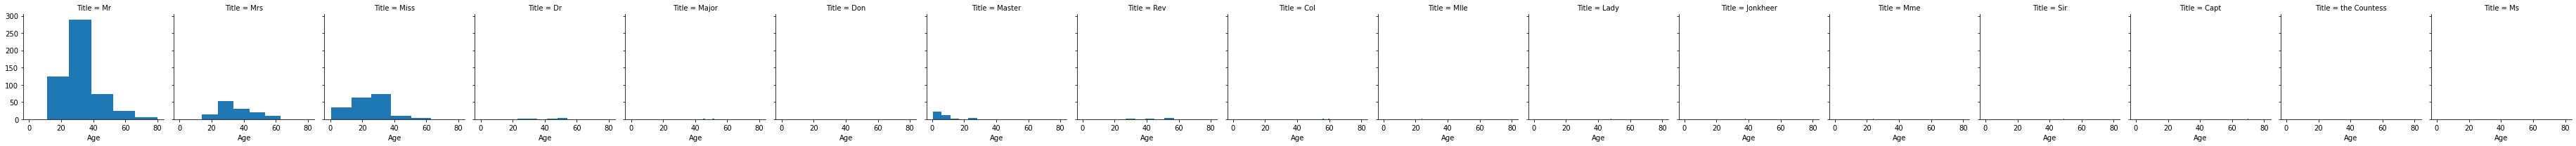

In [128]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Age',bins=5)

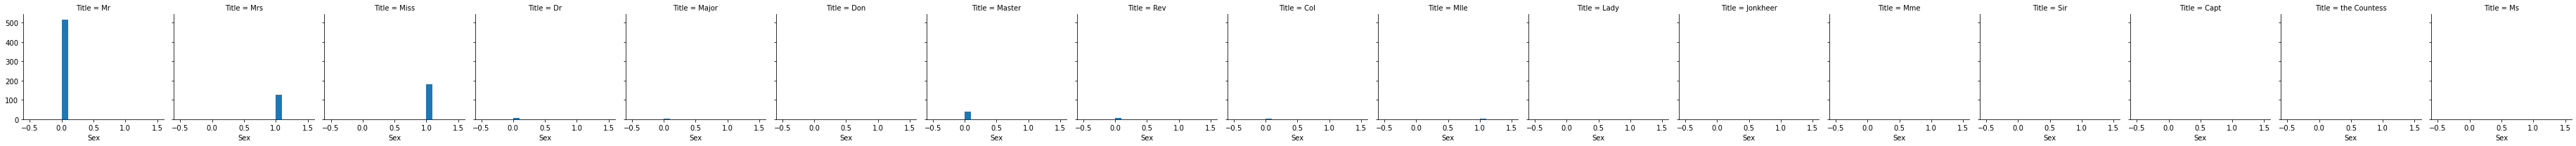

In [129]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Sex')

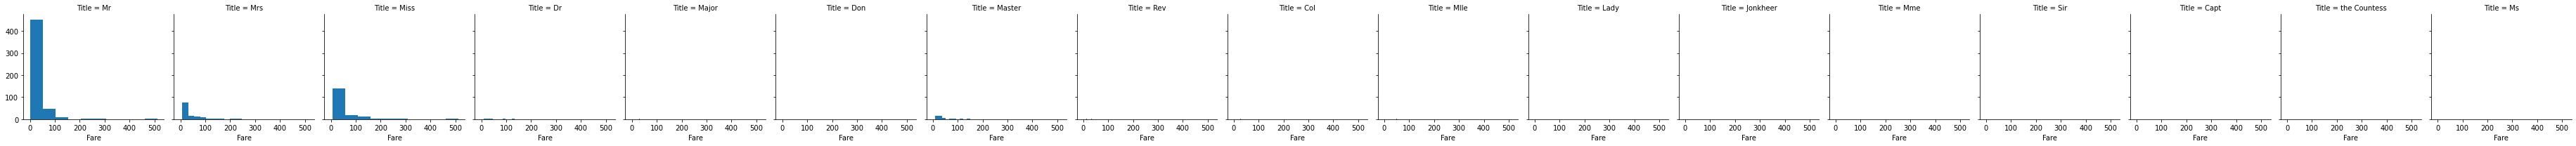

In [105]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Fare')

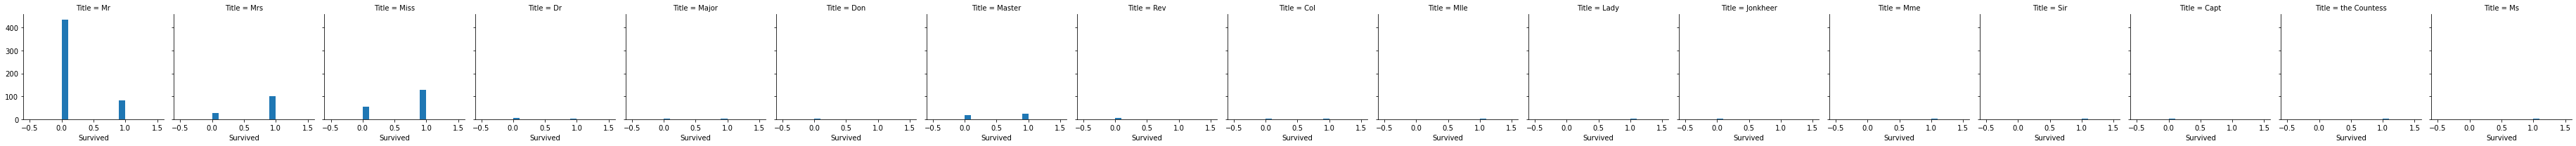

In [106]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Survived')

In [130]:

    
 
clean_Title={'Title':{'Capt':'Officer','Col':'Officer','Major':'Officer','Dr':'Officer','Rev':'Officer','Jonkheer':'Royalty','Don':'Royalty',
'Sir':'Royalty','Lady':'Royalty','the Countess':'Royalty','Dona':'Royalty','Mme':'Miss','Mlle':'Miss','Miss':'Miss','Ms':'Mrs','Mr':'Mrs','Mrs':'Mrs',
'Master':'Master'}}
 
df.replace(clean_Title,inplace=True)


df.head(50)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,0,28.0,0,0,13.0000,0,Mrs
1,0,3,0,25.0,0,0,7.6500,0,Mrs
2,0,3,0,20.0,0,0,7.8542,0,Mrs
3,0,3,1,29.0,0,4,21.0750,0,Mrs
4,0,1,0,31.0,1,0,52.0000,0,Mrs
5,0,3,0,37.0,2,0,7.9250,0,Mrs
6,0,3,0,19.0,0,0,14.5000,0,Mrs
7,1,3,1,1.0,0,2,15.7417,1,Miss
8,0,3,0,20.5,0,0,7.2500,0,Mrs
9,1,2,1,42.0,1,0,26.0000,0,Mrs


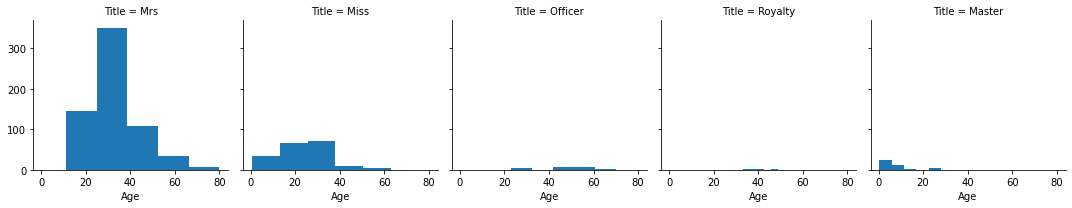

In [131]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Age',bins=5)

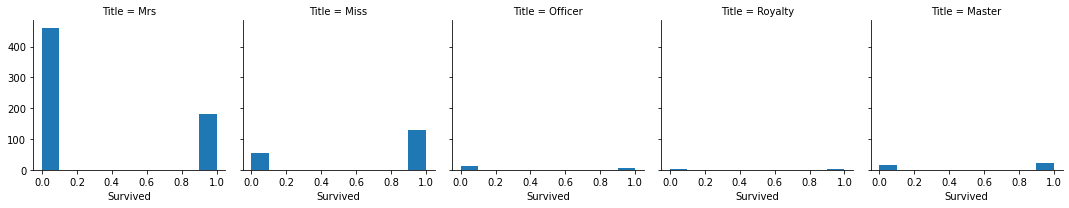

In [142]:
g=sns.FacetGrid(df,col='Title')
g.map(plt.hist,'Survived')

In [132]:
df['has_Family']=((df.Parch!=0)|(df.SibSp!=0)).map({True:1,False:0})
df.has_Family.value_counts()


0    537
1    354
Name: has_Family, dtype: int64

In [133]:
df.loc[df.index].groupby('has_Family')['has_Family','Survived'].agg({'has_Family':['count'],'Survived':['sum']})

<ipython-input-133-4593245fd27c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.loc[df.index].groupby('has_Family')['has_Family','Survived'].agg({'has_Family':['count'],'Survived':['sum']})


,has_Family,Survived
,count,sum
has_Family,,
0,537,163
1,354,179


In [134]:
FamilySize=df.Parch
h=len(FamilySize)
for i in range(0,h):
    
    FamilySize[i]=df.Parch[i]+df.SibSp[i]+1
FamilySize.head(20)    
  

<ipython-input-134-5a5811455b14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FamilySize[i]=df.Parch[i]+df.SibSp[i]+1


0     1
1     1
2     1
3     5
4     2
5     3
6     1
7     3
8     1
9     2
10    1
11    1
12    4
13    2
14    1
15    1
16    3
17    3
18    3
19    2
Name: Parch, dtype: int64

In [135]:
df['FamilySize']=FamilySize
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,has_Family,FamilySize
0,0,2,0,28.0,0,1,13.0000,0,Mrs,0,1
1,0,3,0,25.0,0,1,7.6500,0,Mrs,0,1
2,0,3,0,20.0,0,1,7.8542,0,Mrs,0,1
3,0,3,1,29.0,0,5,21.0750,0,Mrs,1,5
4,0,1,0,31.0,1,2,52.0000,0,Mrs,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,2,30.0708,1,Mrs,1,2
887,0,3,0,22.0,0,1,7.2292,1,Mrs,0,1
888,0,3,1,30.0,0,1,8.6625,0,Miss,0,1
889,0,3,0,28.0,0,1,7.8958,0,Mrs,0,1


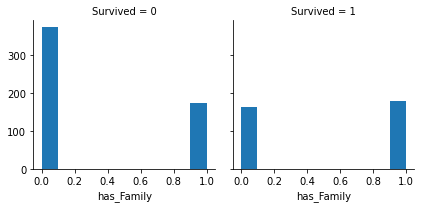

In [139]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'has_Family')

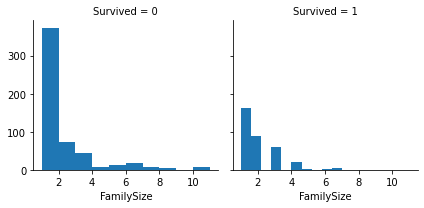

In [140]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'FamilySize')

In [ ]:
#This feature is useful,because we can concude that if family size near to 2 is survived,and the most ones who passed away are alone